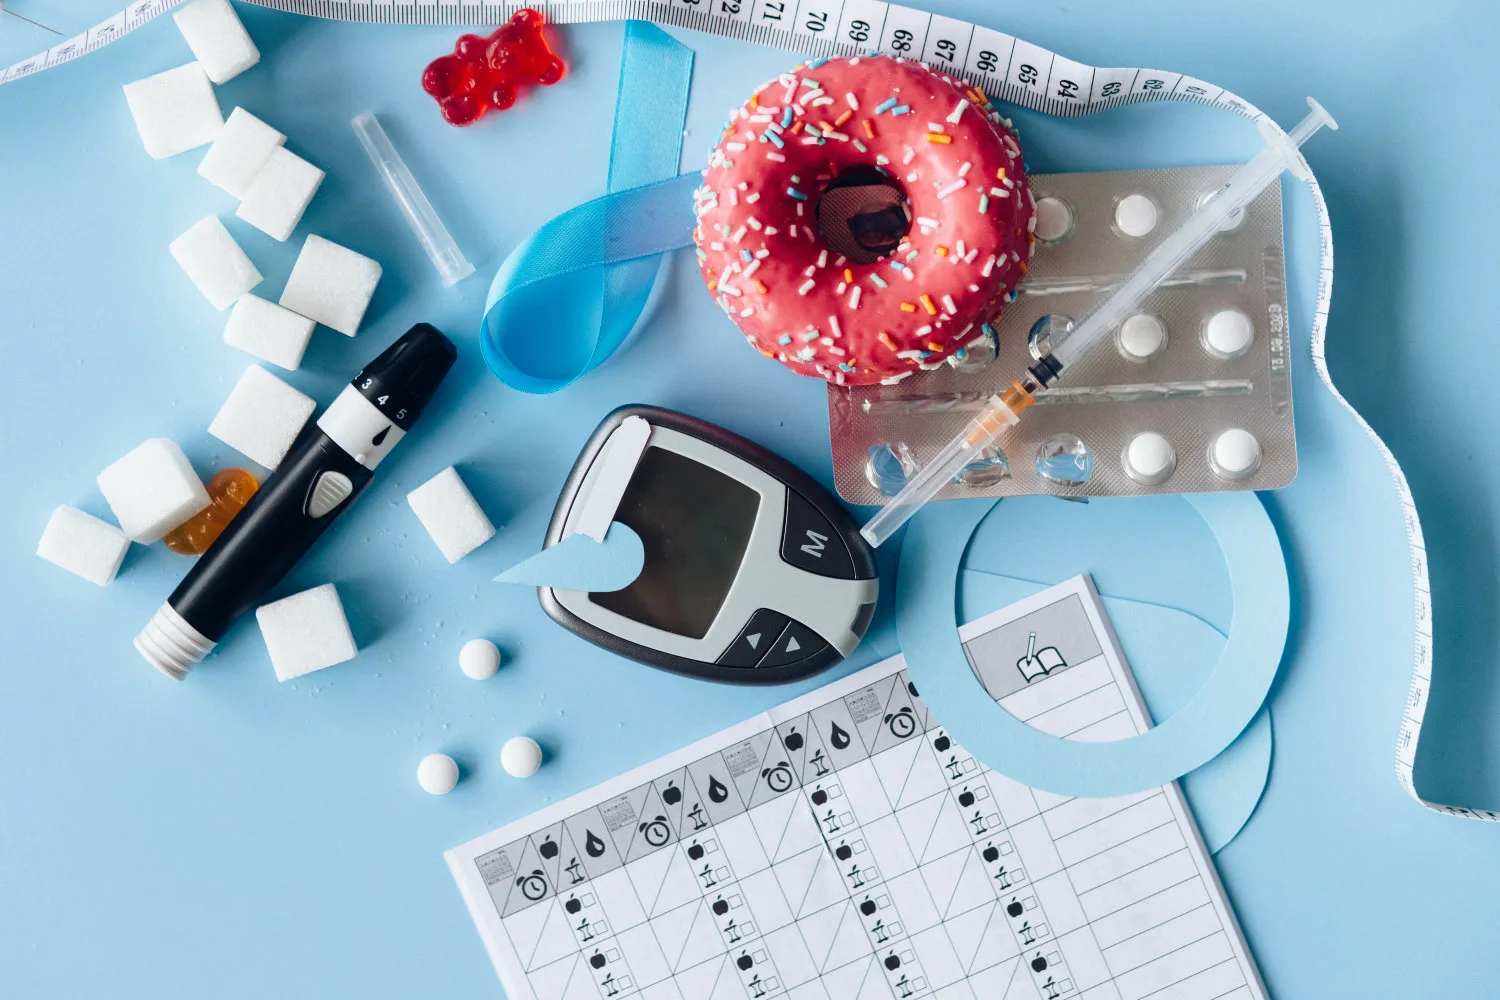

### **Diabetes Prediction Analysis**

To develop a machine learning model that predicts whether a person has diabetes based on medical and lifestyle features. Moreover, we used the **Pima Indians Diabetes Dataset**, which includes features such as:

* Pregnancies
* Glucose
* Blood Pressure
* Skin Thickness
* Insulin
* BMI (Body Mass Index)
* Diabetes Pedigree Function
* Age
* Outcome (0 = No diabetes, 1 = Diabetes)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import shap
import warnings
warnings.filterwarnings('ignore')

In [55]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

data = pd.read_csv(url, names = columns)

data.head(10)

#note: we can find the dataset on Kaggle, too.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.shape

(768, 9)

Using "*.shape* " we can learn size of our  dataset (number of columns and rows)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Alternatively, we can use "*.isna().sum()* ", there is no difference between them.

Eventually, **we don't have any NULL values**.

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*data.describe()* is a **Pandas** function in Python that generates **summary statistics** for numerical (and optionally categorical) columns in a DataFrame.

* `count`: Number of non-null values
* `mean`: Average value
* `std`: Standard deviation
* `min`: Minimum value
* `25%`, `50%`, `75%`: Percentiles (quartiles)
* `max`: Maximum value

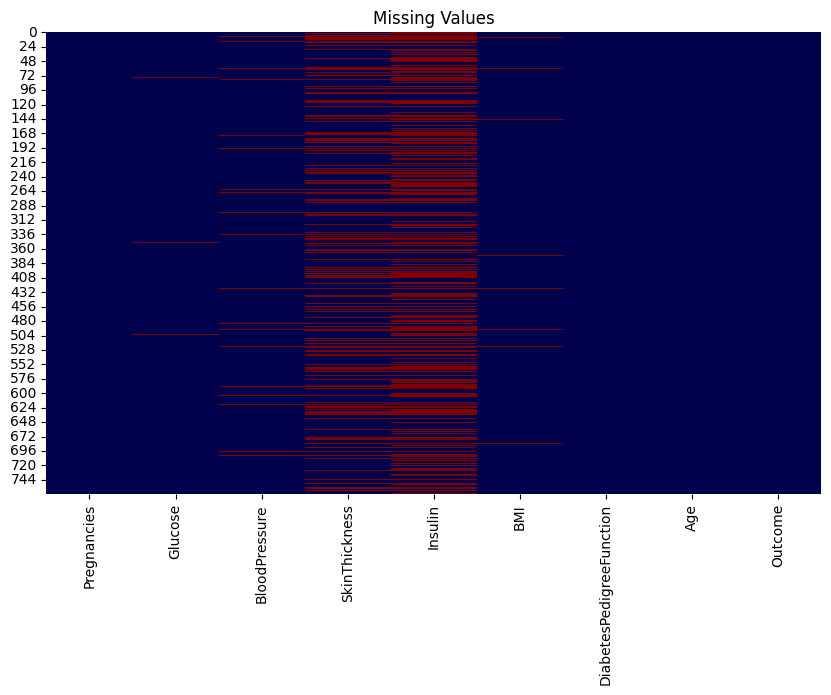

In [61]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
    data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

plt.figure(figsize = (10, 6))
sns.heatmap(data.isnull(), cbar = False, cmap = 'seismic')
plt.title('Missing Values')
plt.show()

Firstly, many medical features like Glucose, BloodPressure, etc., should not be zero in real patients. For that reason, we should replaces all 0 values in the selected columns with np.nan to mark them as missing data.

Furthermore, we need to plot to identify and visualize missing or invalid data entries in a diabetes dataset.

In [63]:
data.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [64]:
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[column].fillna(data[column].median(), inplace = True)

data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


We replaced all NULL values with median (2nd(50%) quartile).

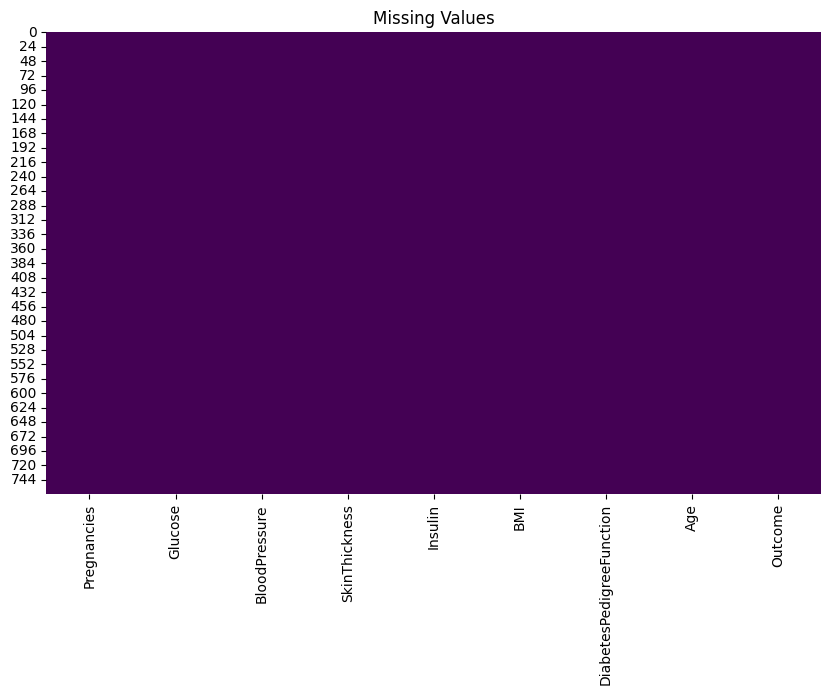

In [65]:
plt.figure(figsize = (10, 6))
sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Values')
plt.show()

we plot it again for verification.

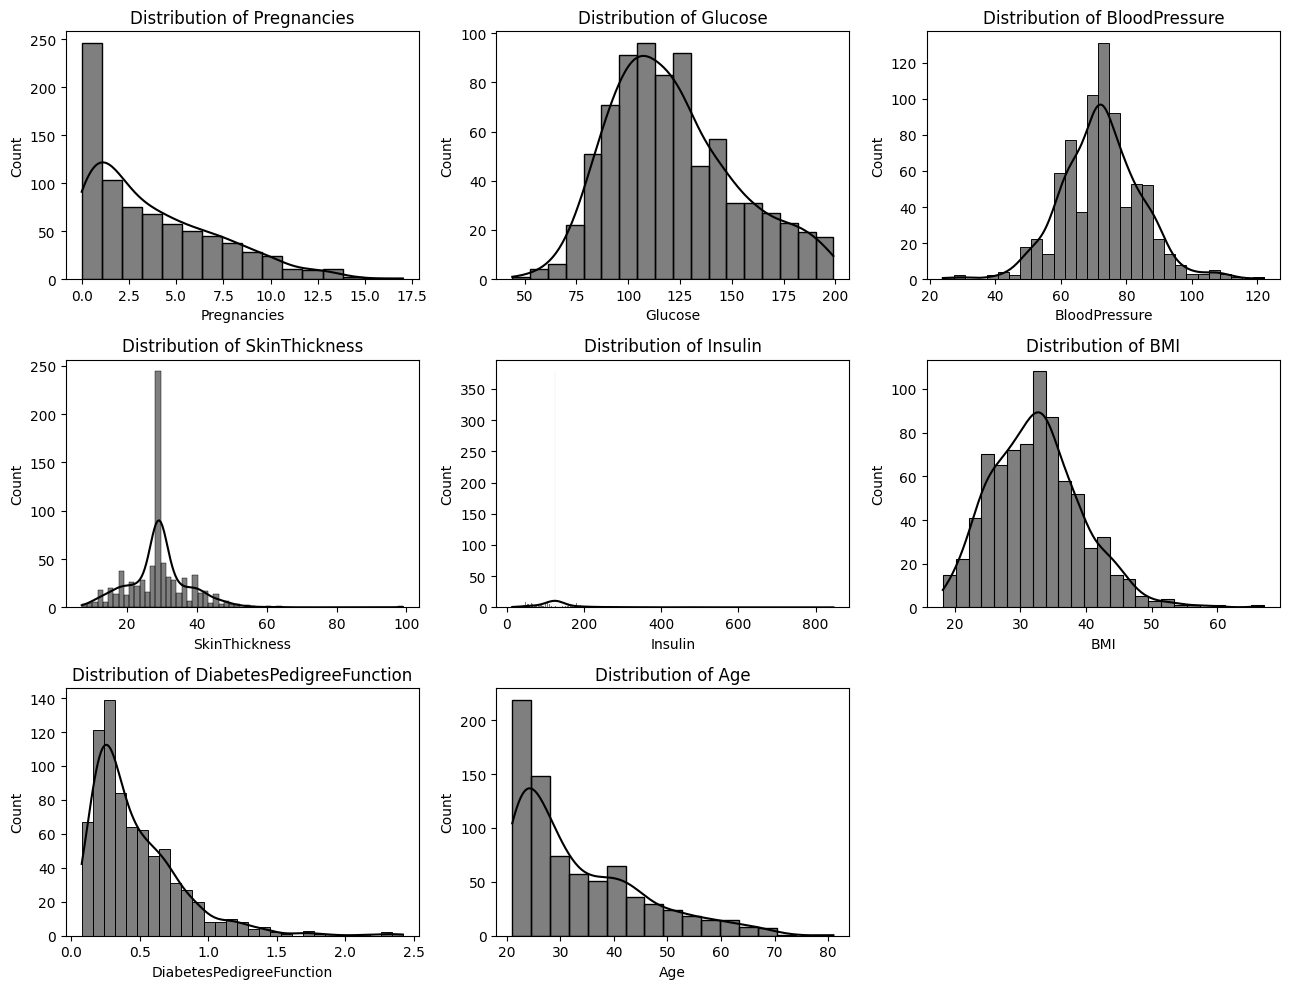

In [67]:
plt.figure(figsize = (13, 10))
for i, column in enumerate(data.columns[ : -1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde = True, color = 'k')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

To visualize the distribution of each feature (except the target column) in the dataset using histograms with KDE (Kernel Density Estimation) curves.

* ***KDE***

It stands for Kernel Density Estimation, and is a non-parametric way to estimate the probability density function (PDF) of a continuous variable.

Instead of plotting just a histogram, which is discrete and depends on bin size, KDE smooths the distribution using a kernel function (typically a Gaussian) centered at each data point.

For instance, imagine that each data point "spreads" a little bump (like a bell curve). KDE adds all these bumps together to produce a smooth curve that shows where the data is concentrated.

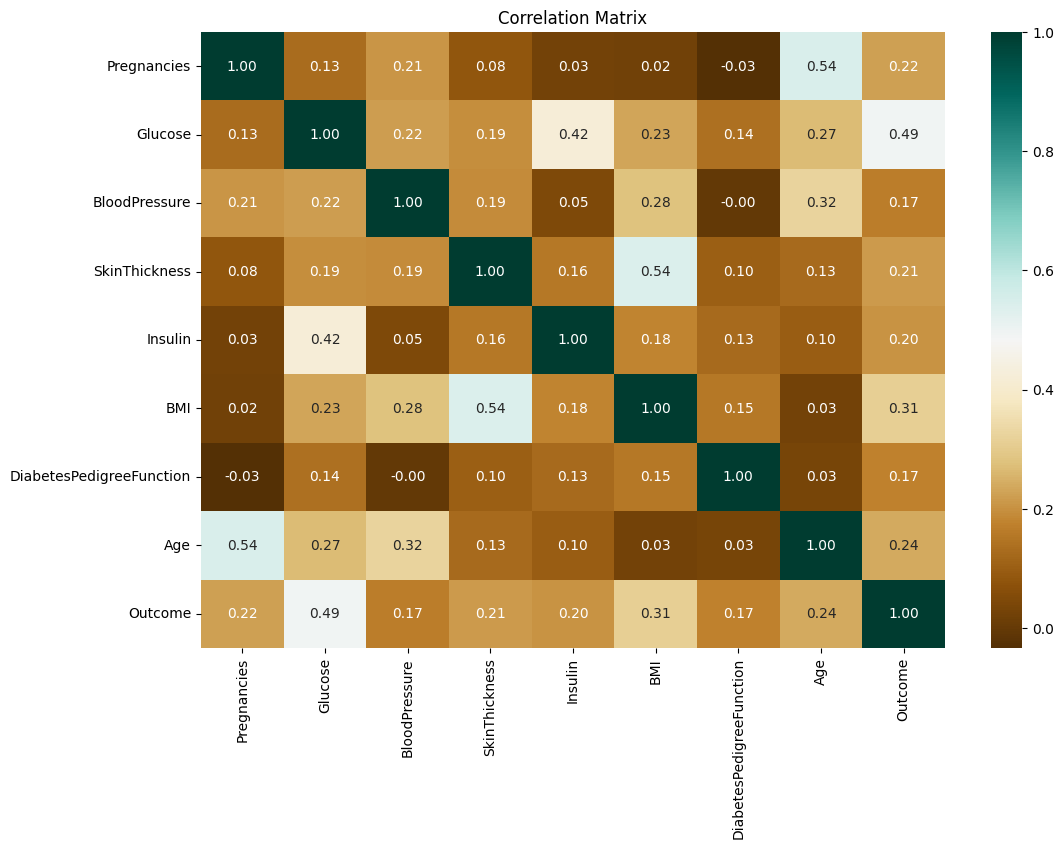

In [68]:
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), annot = True, cmap = 'BrBG', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

**Correlation** measures the **linear relationship** between two variables. It tells us how one variable changes with respect to another. It ranges between -1 to +1:

  * `+1`: Perfect positive correlation
  * `0`: No linear correlation
  * `-1`: Perfect negative correlation

* ***Pearson Correlation Coefficient (r)***

*Formula:* $r_{xy} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}$

In here,

* $x_i, y_i$: data points
* $\bar{x}, \bar{y}$: means of x and y
* $r_{xy}$: correlation between x and y

In [69]:
# Split features and target
x = data.drop('Outcome', axis = 1)
y = data['Outcome']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Standardize
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

* *Scaling*

Scaling in ML is all about getting your data to play nice together so your model doesn't trip over numbers that are on totally different scales like height in CMs say 180 and weight in KGs say 80 without scaling big numbers can bully smaller ones in algorithms like KNN, SVM or neural networks because they rely on distances or gradients scaling makes sure every feature gets an equal shot so your model learns better and faster its super important for stuff like gradient descent where big differences in scale can slow things down or mess up results plus it keeps things fair so no feature dominates just cause its numbers are bigger you dont always need scaling though like with decision trees or random forests since they don't care about scale but for most other models its a must.

Now, let's talk two big scaling methods **MinMaxScaler and Z-score** standardization a.k.a StandardScaler;

** *MinMaxScaler* ** takes your data and squashes it into a set range usually 0 to 1 it works by taking each value subtracting the smallest value in the feature and dividing by the range which is max minus min the formula is x scaled equals $X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$* so if the heights are 170, 180, 190 the "min is 170",  "max is 190",  "range is 20". Thus,

* 180 => 180 minus 170 divided by 20 which is *0.5*
* 170 => 170 minus 170 divided by 20 which is *0.0*
* 190 => 190 minus 170 divided by 20 which is *1.0*

Eventually, this puts everything between 0 and 1 keeping the relative distances between values its great for models that like bounded data like NNs but watch out for outliers cause a crazy high or low value can squish everything else.

On the other hand, * **Z-score standardization or StandardScaler** * is different it makes your data have a mean of 0 and a standard deviation of 1 basically centering it around zero with a consistent spread the formula is, ($X_{\text{scaled}} = \frac{X - \mu}{\sigma}$). This method assumes your data is kinda normal bell curve ish and works awesome for algorithms like linear regression or SVM but outliers can mess with the mean and standard deviation so if your data’s wild you might need something else like RobustScaler.

* Mean: $\mu = \frac{180 + 170 + 190}{3} = 180$
* Std: $\sigma = \sqrt{\frac{(180-180)^2 + (170-180)^2 + (190-180)^2}{3}} = \sqrt{\frac{0 + 100 + 100}{3}} \approx 8$

Then;
* Z(180) => 180 minus 180 divided by 8 which is *0.0*
* Z(170) => 170 minus 180 divided by 8 which is *-1.2*
* Z(190) => 190 minus 180 divided by 8 which is *1.2*

Key points always scale after splitting your data into training and test sets to avoid data leakage where test info sneaks into training only fit your scaler on training data then use it to transform both training and test data MinMax is good for bounded ranges Z-score is better for normally distributed data if you got outliers RobustScaler might be your friend since it uses medians instead of means you can also reverse scaling to get back to original values which is handy for interpreting results.

In [70]:
model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

* ***RandomForestClassifier***

It is an ensemble machine learning algorithm in Scikit-learn used for classification tasks. It builds multiple decision trees and combines their predictions to improve accuracy and avoid overfitting. So, it’s part of the Random Forest algorithm, which is:

1. Based on the principle of bagging (Bootstrap Aggregating)
2. Uses multiple decision trees built on random subsets of data and features
3. Final prediction is made by majority voting

Accuracy: 0.812
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       107
           1       0.69      0.70      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



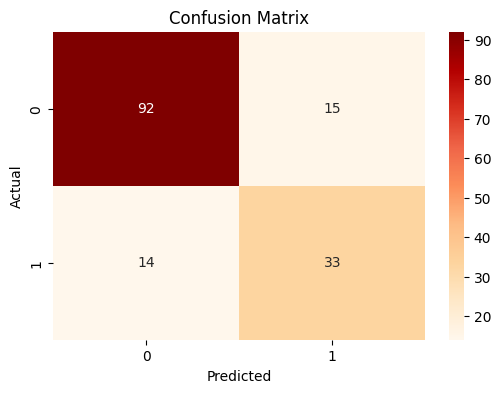

In [72]:
# Accuracy score
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc:.3f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, pred))

# Confusion Matrix
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = 'd', cmap = 'OrRd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**1. Accuracy Score**

It is the **ratio of correct predictions to total predictions**.

*Formula:* $\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$

*For example:* $\text{Accuracy} = \frac{90}{100} = 0.90 \text{ (or 90%)}$

Note: accuracy can be **misleading** for **imbalanced datasets** (e.g., predicting 90% "no" in a dataset with 90% "no" class is not always good).

**2. Classification Report**


A detailed summary of key classification metrics for each class:

**3. Confusion Matrix**

A confusion matrix is a table that shows how well your model did at predicting stuff, like frauds (Class=1) versus non-frauds (Class=0). It compares what your model predicted to what’s actually true, breaking it down into four boxes; true positives, true negatives, false positives, and false negatives. It’s super useful for fraud detection task because it shows how good XGBoost model is at catching frauds without flagging too many non-frauds.

* *True Positives (TP):* Model says fraud, and it’s actually fraud.
* *True Negatives (TN):* Model says non-fraud, and it’s actually non-fraud.
* *False Positives (FP):* Model says fraud, but it’s non-fraud.
* *False Negatives (FN):* Model says non-fraud, but it’s actually fraud.

From this, we can calculate;

* *Recall* = TP / (TP + FN)
* *Precision* = TP / (TP + FP)
* *F1 Score:* Balances precision and recall.

In [73]:
params = {
    'n_estimators': [300, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]}

grid = GridSearchCV(model, params, cv = 5, scoring = 'accuracy')
grid.fit(x_train, y_train)

print("\nBest Parameters:", grid.best_params_)

# Train best model
best_model = grid.best_estimator_
best_pred = best_model.predict(x_test)


Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}


* **Hyperparameter Tuning**

In machine learning, *hyperparameters* are external configuration values set *before training*. **Tuning** means **searching for the best combination** of these hyperparameters to maximize model performance.

* **GridSearchCV**

It searches for the best hyperparameter combination;

  * `model`: base estimator (Random Forest Classifier)
  * `params`: the parameter grid
  * `cv = 5`: performs **5-fold cross-validation** to test each combination
  * `scoring = 'accuracy'`: uses accuracy as the evaluation metric

It trains all 18 combinations using 5-fold CV, and tracks the combination with the highest *average validation accuracy*.

Accuracy: 0.818
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



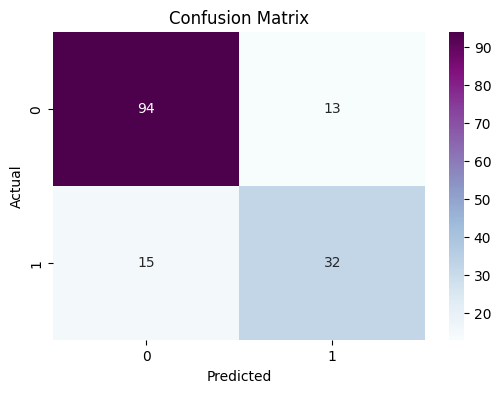

In [74]:
acc = accuracy_score(y_test, best_pred)
print(f"Accuracy: {acc:.3f}")
print("Classification Report:")
print(classification_report(y_test, best_pred))

# Confusion Matrix
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, best_pred), annot = True, fmt = 'd', cmap = 'BuPu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

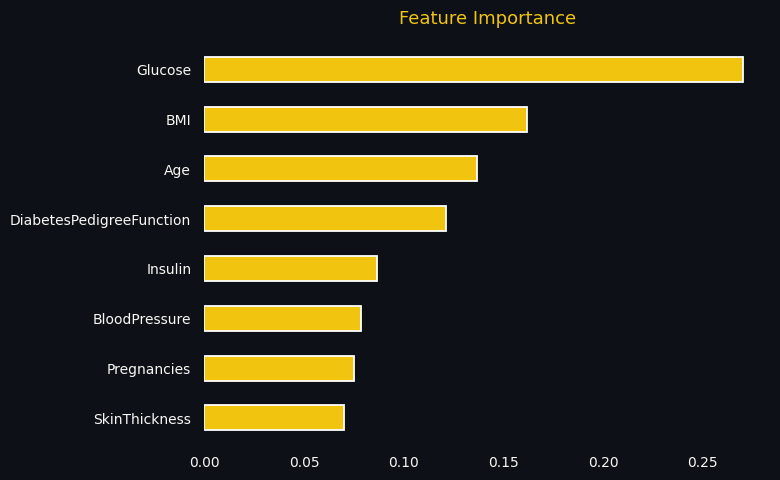

In [84]:
fi = pd.Series(best_model.feature_importances_, index = x.columns).sort_values(ascending = True)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (8, 5))
fig.patch.set_facecolor('#0d1117')
ax.set_facecolor('#0d1117')

fi.plot(kind = 'barh', color = '#f1c40f', edgecolor = 'white', linewidth = 1.3, ax = ax)

ax.set_title('Feature Importance', fontsize = 13, color = '#f1c40f', pad = 15)
ax.grid(visible = False)
for spine in ax.spines.values(): spine.set_visible(False)
ax.tick_params(colors = '#f8f8f2', labelsize = 10)

plt.tight_layout()
plt.show()

Basically, it is using for to identify and visualize *which features most influence* the predictions of the trained *RandomForestClassifier* model.

In [93]:
# Example usage

new_patient = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])
new_patient_scaled = sc.transform(new_patient)
prediction = best_model.predict(new_patient_scaled)

feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print("New Patient Data:\n" + "-" * 40)
for feature, value in zip(feature_names, new_patient[0]): print(f"{feature:<25}: {value}")
print("-" * 40)

result = "DIABETES :(" if prediction[0] == 1 else "NO DIABETES :)"
print(f"Prediction               : {prediction[0]}  ->  {result}")

if 'probability' in locals(): print(f"Confidence               : {probability:.1%}")

New Patient Data:
----------------------------------------
Pregnancies              : 6.0
Glucose                  : 148.0
BloodPressure            : 72.0
SkinThickness            : 35.0
Insulin                  : 0.0
BMI                      : 33.6
DiabetesPedigreeFunction : 0.627
Age                      : 50.0
----------------------------------------
Prediction               : 1  ->  DIABETES :(
Confidence               : 54.8%


The code;

1. takes new patient data.
2. Preprocesses it using a previously fitted scaler.
3. Uses the trained model to predict whether the patient has diabetes (1) or not (0).
4. Prints each feature clearly with its value.
5. Shows prediction confidence if a probability variable is available.

In conclusion, based on the input values for the new patient, the model predicts a positive diagnosis for diabetes with a confidence of 54.8%. While the model itself has an overall accuracy of 81.8%, this particular prediction indicates moderate certainty. It's important to note that the model is a statistical approximation and should not be used as a substitute for clinical evaluation. For final judgment, the patient is strongly advised to consult with a medical professional.

In [91]:
# Finally

***I WOULD LIKE TO EXPRESS MY SINCERE GRATITUDE FOR YOUR TIME AND CONSIDERATION***

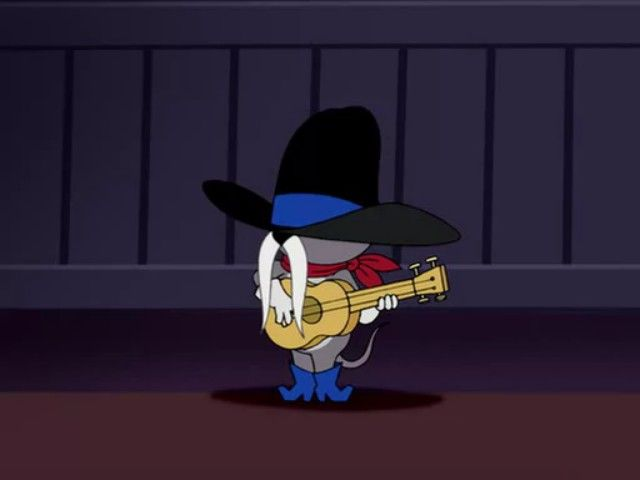